<a href="https://colab.research.google.com/github/Yewon-dev/boostcamp-AI-Tech/blob/master/TIL/%5BBasic%5DMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🤓 To be a good deep learner.. 

- Implementation skills
- Math Skills (Linear algebra, Probability)
- Knowing a lot of recent Papers



# Linear Neural Networks
- Data : $D = \{(x_i,y_i)\}^{N}_{i=1}$
- Model : $\hat{y} = wx+b$
- Loss : $loss = \frac{1}{N}\sum_{i=1}^{N}{(y_i-\hat{y_i})^2}$

이때 우리는 loss를 최소화해야 하기 때문에, 
1. loss function을 w와 b에 대해 편미분하고
2. 원래의 w, b값에 특정 step size($\eta$)를 곱한 편미분값을 빼주면서 w와 b를 업데이트 해준다.
>$w ← w - \eta\frac{\partial loss}{\partial w}$
>$b ← b - \eta\frac{\partial loss}{\partial b}$

**multi dimentional** input, output에서도
$y = W^Tx + b$로 나타낼 수 있다.

더 나아가 $W^T$를 여러 개 쌓는다면, $y = W^{T}_{2}W^{T}_{1}x$로 표현할 수 있지만, $W^{T}_{2}W^{T}_{1}$는 단순 행렬 두개의 곱으로만 표현된다.

따라서 두 행렬 사이에 *non-linear transform*이 필요하다. 이때 **activation function**를 곱해줌으로써 non-linear transform을 거치게 된다.
> $y = W^{T}_{2} \rho(W^{T}_{1}x)$





## Activation Function
- ReLU (Rectified Linear Unit)
- sigmoid
- Hyperbolic Tangent



## Loss Function 
[*pytorch docs*](https://pytorch.org/docs/stable/nn.html#loss-functions)

- **Regression Task**
$$MSE = \frac{1}{N}∑^{N}_{i=1}∑^{D}_{d=1}(y_i^{(d)}-\hat{y}_i^{(d)})^2$$
- **Classification Task**
$$ CE = -\frac{1}{N}∑^{N}_{i=1}∑^{D}_{d=1}y_i^{(d)} log{\hat{y}_i^{(d)}}$$
예측한 값($\hat y$)이 해당하는 class에서 높아지면 분류하기 쉬움 (ex. one-hot)
- **Probabilistic Task** 
$$MLE = \frac{1}{N}∑^{N}_{i=1}∑^{D}_{d=1}logN(y_i^{(d)};\hat{y}_i^{(d)},1)$$ (=MSE) 


------
# Implementation
### **Multi Layer Perceptron (MLP)**
- dataset : MNIST


#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina' # 더 좋은 화질을..
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.10.0+cu111].
device:[cuda:0].


#### Download Dataset

In [ ]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

#### Data Iterator

In [3]:
## Mini batch training을 위해 Iterator 생성
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


#### Define the MLP model

In [4]:
class MultiLayerPerceptronClass(nn.Module):
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim      ## input
        self.hdim = hdim      ## hidden
        self.ydim = ydim      ## output
        self.lin_1 = nn.Linear(self.xdim, self.hdim)
        self.lin_2 = nn.Linear(self.hdim, self.ydim)
        self.init_param() # initialize parameters
        
    def init_param(self):
        nn.init.kaiming_normal_(self.lin_1.weight) ## weight을 kaming he normal로 초기화
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net)
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device)
loss = nn.CrossEntropyLoss()     ## loss function
optm = optim.Adam(M.parameters(),lr=1e-3)   ## optimize
print ("Done.")

Done.


In [5]:
x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device)  ## x_numpy to tensor
y_torch = M.forward(x_torch) # forward path
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array (출력하기 위해)
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.92521382 0.23853604 0.07884702 ... 0.22141589 0.12176862 0.99166968]
 [0.9144835  0.30370655 0.94597528 ... 0.78017705 0.65658582 0.79543178]]
x_torch:
 tensor([[0.9252, 0.2385, 0.0788,  ..., 0.2214, 0.1218, 0.9917],
        [0.9145, 0.3037, 0.9460,  ..., 0.7802, 0.6566, 0.7954]],
       device='cuda:0')
y_torch:
 tensor([[-1.1954,  0.0214,  0.2855,  0.7359, -0.6307, -1.7979, -0.5007,  0.1514,
          1.2677, -0.8230],
        [-0.7682, -0.8230,  0.4660,  0.2401, -0.0582, -0.9777, -0.9275,  0.1771,
          1.2034, -1.1098]], device='cuda:0', grad_fn=<AddmmBackward0>)
y_numpy:
 [[-1.195414    0.021377    0.2855278   0.73594177 -0.6306747  -1.7978928
  -0.5007049   0.1513694   1.2676665  -0.8230159 ]
 [-0.7681685  -0.8230463   0.46603015  0.24011159 -0.05818951 -0.9777402
  -0.9274518   0.17706445  1.2034072  -1.1097525 ]]


#### Parameters

In [6]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()):
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[-0.029 -0.01   0.156  0.011 -0.043]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[ 0.108 -0.003  0.019 -0.087  0.07 ]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


#### Evaluation Function

In [7]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        model.eval() # evaluate (affects DropOut and BN)
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(batch_in.view(-1,28*28).to(device))
            _,y_pred = torch.max(model_pred.data,1) ## max 값이 예측 label이 됨
            n_correct += (y_pred==y_trgt).sum().item() ## y_pred==y_trgt count
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total) ## 맞은 개수 / 전체 개수
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


#### Initial Evaluation

In [8]:
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.097] test_accr:[0.096].


#### Train

In [9]:
print ("Start training.")
M.init_param() # initialize parameters
M.train()
EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))    ## loss 값
        # Update
        optm.zero_grad()      # reset gradient 
        loss_out.backward()   # backpropagate       ## 각각의 weight에 대해서 loss가 쌓임
        optm.step()           # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")        

Start training.
epoch:[0] loss:[0.377] train_accr:[0.947] test_accr:[0.944].
epoch:[1] loss:[0.168] train_accr:[0.965] test_accr:[0.958].
epoch:[2] loss:[0.121] train_accr:[0.973] test_accr:[0.968].
epoch:[3] loss:[0.092] train_accr:[0.980] test_accr:[0.972].
epoch:[4] loss:[0.073] train_accr:[0.984] test_accr:[0.973].
epoch:[5] loss:[0.060] train_accr:[0.987] test_accr:[0.976].
epoch:[6] loss:[0.049] train_accr:[0.990] test_accr:[0.977].
epoch:[7] loss:[0.041] train_accr:[0.992] test_accr:[0.978].
epoch:[8] loss:[0.034] train_accr:[0.994] test_accr:[0.978].
epoch:[9] loss:[0.029] train_accr:[0.995] test_accr:[0.979].
Done


#### Test

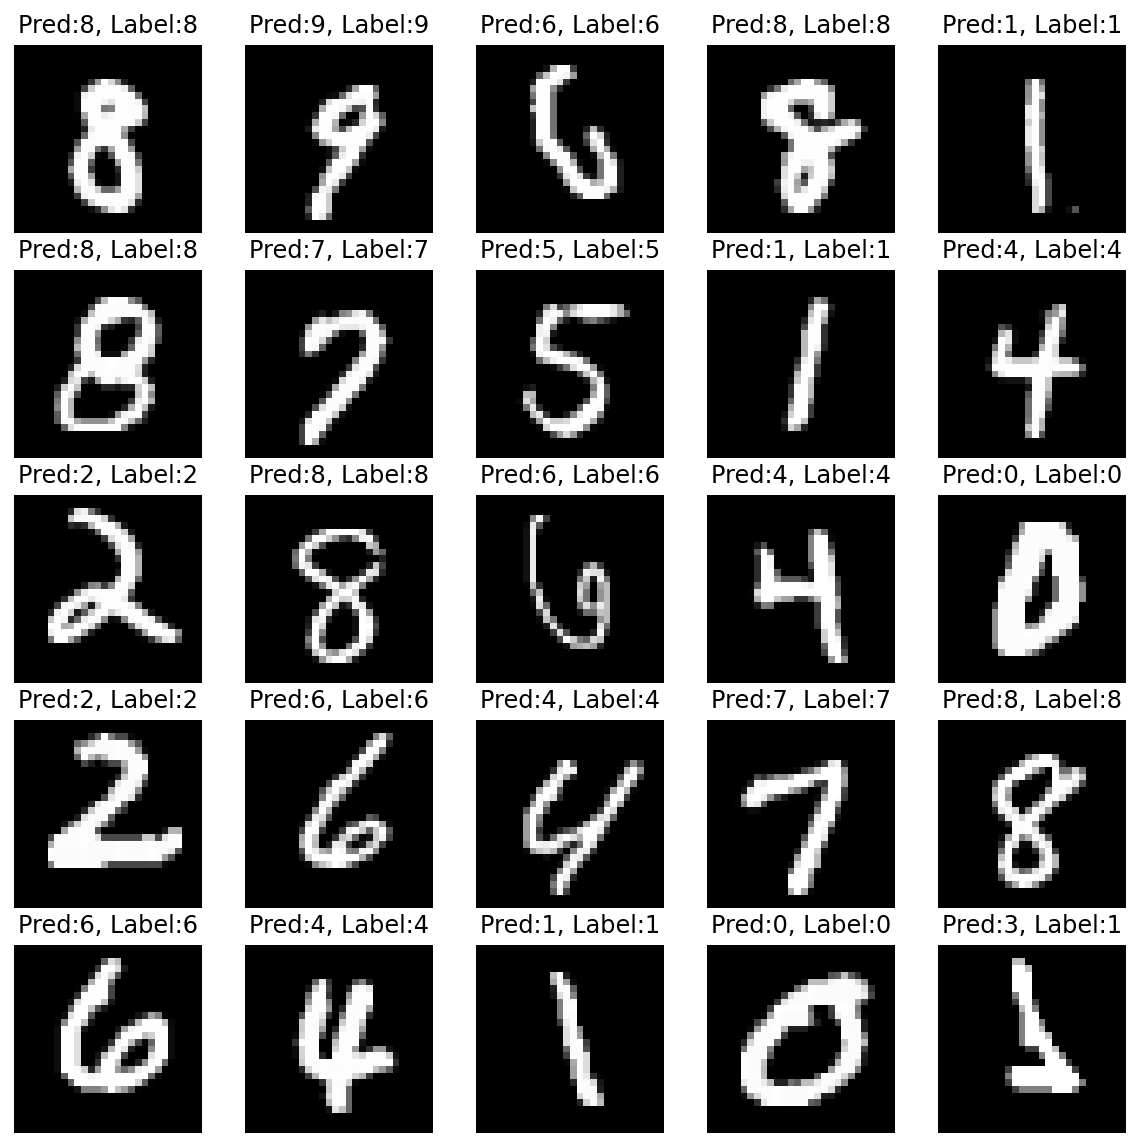

Done


In [10]:
n_sample = 25
## test data에서 25개 choice
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()    
print ("Done")